In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Feed Forward
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z # returning Z here as it is required to calculate the gradient

# Determining the classification Rate
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct/n_total)

Lets create the data

In [9]:
Nclass = 500
D = 2
M = 3
K = 3

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
T = np.zeros((N, K))

for i in range(N):
    T[i, Y[i]] = 1 # One hot encoding for the targets

Visualizing the data

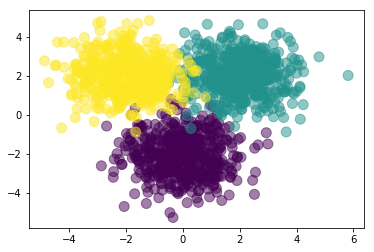

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

In [ ]:
# Randomly initialize the weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 10e-7
costs = []

for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0: # every 100 epoch we are going to calculate the costs
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("Cost = {0} and classification rate is {1}".format(c, r))
        costs.append(c)
        
    # Now doing gradient ascend
    # +ve instead of negative : t-y instead of y-t
    W2 += learning_rate * derivative_w2(hidden, T, output)
